# Predicting Loan Payoff vs. Collection using Scikit-Learn: Comparing Different Classification Algorithms 

## Introduction
In this project, costumer loan payoff was predicted using the following classification algorithms: 

- k-nearest neighbors (KNN)
- Decision Trees
- Support-vector machine (SVM)
- Logistic Regression

To train and evaluate the accuracy of the classification algorithms, a dataset of past loans was used, which include details of 346 customers whose loan were already paid off or defaulted. The performance of the different classifiers was then evaluated on a test set and their accuracy results were summarized and compared. The data set includes the following fields: 


- **Loan_status**:	 Whether a loan is paid off or in collection
- **Principal**:  	 Basic principal loan amount at the
- **Terms**: 	 	     Weekly (7 days), biweekly, and monthly payoff schedule
- **Effective_date**:  When the loan got originated and took effects
- **Due_date**: 	     Payoff due date
- **Age**: 		     Age of applicant
- **Education**: 	     Education of applicant
- **Gender**:	         The gender of applicant


## Table of contents: 
1. Loading and examining the train data-set
2. Exploring the data using categorical and Pearson's correlations
3. Data visualization of specific variable combinations
4. Pre-processing: Feature selection / extraction
5. Classification
6. Model Evaluation using Test set
7. Models' Evaluation Report


### Importing the required libraries

In [94]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

import dython as dy
from dython.nominal import associations



# 1. Loading and examining the train data-set

## 1.1. Load data from CSV file  

In [96]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [97]:
df.shape

(346, 10)

## 1.2. Checking the dataset for any missing values

In [98]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


In [99]:
display(df.isnull().head().sum())
display(df.isnull().head())

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


The data looks very clean with no missing data

## 1.3. Examine the number of cases of each class in the data set 

In [100]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


# 2. Exploring the data using categorical and Pearson's correlations

## 2.1. Examining associations between variables in the data set - using categorical correlation
Since the data set include categorical variables, it is not straight forward to use Pearson's correlation before preprocessing the data. Thus, two forms of categorical correlation will be used, including Cramer’s V and Theil’s U. 

**Cramér's V** is a measure of association between two nominal variables, giving a value between 0 and +1 (inclusive). It is based on Pearson's chi-squared statistic. Similarly to correlation, Cramér's V output is in the range of [0,1], where 0 means no association and 1 is full association. In addition, Cramer’s V is symmetrical — it is insensitive to swapping x and y, i.e., V(x,y)=V(y,x), where V is Cramer’s V.  


**Theil’s U** (also referred to as the Uncertainty Coefficient) is an asymmetric measure of association between categorical features, based on the conditional entropy between x and y, i.e., given the value of x, how many possible states does y have, and how often do they occur. The output value is on the range of [0,1], with the same interpretations as of Cramér's V, yet it is asymmetric, meaning U(x,y)≠U(y,x), where U is Theil’s U.

In this project we use these statistical tests by implementing the **dython library**.

For more information, see:
- https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
- http://shakedzy.xyz/dython/examples.html
- https://github.com/shakedzy/dython

### 2.1.1. Installing the dython library 

In [101]:
# Uncomment the following if the dython library is not installed in your machine

#pip install dython

### 2.1.2. Cramér's V analysis

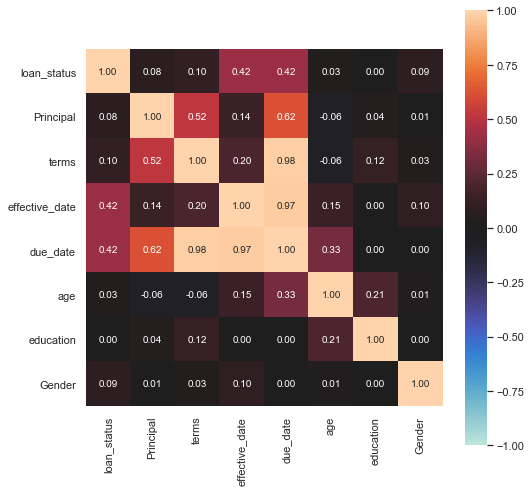

{'corr':                 loan_status  Principal     terms  effective_date  due_date  \
 loan_status        1.000000   0.076309  0.102102        0.420213  0.421612   
 Principal          0.076309   1.000000  0.521876        0.138883  0.622952   
 terms              0.102102   0.521876  1.000000        0.198225  0.976787   
 effective_date     0.420213   0.138883  0.198225        1.000000  0.969049   
 due_date           0.421612   0.622952  0.976787        0.969049  1.000000   
 age                0.027479  -0.060893 -0.064762        0.145709  0.325270   
 education          0.000000   0.041071  0.124802        0.000000  0.000000   
 Gender             0.086194   0.005134  0.032399        0.096452  0.000000   
 
                      age  education    Gender  
 loan_status     0.027479   0.000000  0.086194  
 Principal      -0.060893   0.041071  0.005134  
 terms          -0.064762   0.124802  0.032399  
 effective_date  0.145709   0.000000  0.096452  
 due_date        0.325270   0.0000

In [102]:
# using Cramér's V (by setting theil_u=False)
associations(df.iloc[:,2:], theil_u=False, figsize=(8, 8))

### 2.1.3. Theil’s U analysis

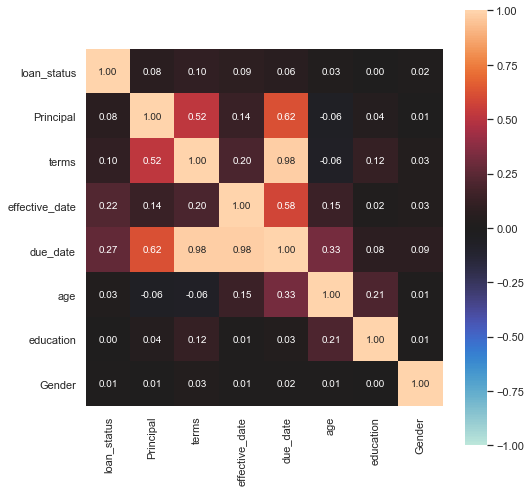

{'corr':                 loan_status  Principal     terms  effective_date  due_date  \
 loan_status        1.000000   0.076309  0.102102        0.087126  0.062569   
 Principal          0.076309   1.000000  0.521876        0.138883  0.622952   
 terms              0.102102   0.521876  1.000000        0.198225  0.976787   
 effective_date     0.221384   0.138883  0.198225        1.000000  0.584287   
 due_date           0.266284   0.622952  0.976787        0.978616  1.000000   
 age                0.027479  -0.060893 -0.064762        0.145709  0.325270   
 education          0.002088   0.041071  0.124802        0.014499  0.034558   
 Gender             0.012238   0.005134  0.032399        0.009948  0.015149   
 
                      age  education    Gender  
 loan_status     0.027479   0.001151  0.016215  
 Principal      -0.060893   0.041071  0.005134  
 terms          -0.064762   0.124802  0.032399  
 effective_date  0.145709   0.020319  0.033493  
 due_date        0.325270   0.0811

In [103]:
# using Theil’s U (by setting theil_u=True)
associations(df.iloc[:,2:], theil_u=True, figsize=(8, 8))

### 2.1.4. Interim discussion

 - Interestingly,  when looking on the "loan_status" column, in both matrixes, the strongest association is to the effective date and due date.

 - This suggests that the time of taking the loan can serve as a feature for predicting loan payoff vs. collection.

 - This association will be further examined below.

## 2.2. Convert to date time object 

In [104]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


## 2.3. Adding columns of time related features 
i.e. day-of-the-week, day-of-month, month, and year of whan taking the loan

In [105]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['dayofmonth'] =  df['effective_date'].dt.day
df['month'] =  df['effective_date'].dt.month
df['year'] =  df['effective_date'].dt.year
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,dayofmonth,month,year
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,8,9,2016
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,8,9,2016
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,8,9,2016
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,9,9,2016
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,9,9,2016


## 2.4. Examining the different time related columns

In [106]:
print("Loans were taken in the following days of the week: ", df["dayofweek"].unique())
print("Loans were taken in the following days of the month: ", df["dayofmonth"].unique())
print("Loans were taken in the following months: ", df["month"].unique())
print("Loans were taken in the following years: ",df["year"].unique())

Loans were taken in the following days of the week:  [3 4 5 6 0 1 2]
Loans were taken in the following days of the month:  [ 8  9 10 11 12 13 14]
Loans were taken in the following months:  [9]
Loans were taken in the following years:  [2016]


**From this output we see that the loan data in the current data set was obtained from a very short period of a single week, from the 8th to 14th of September, 2016.**  

- Potentially, the time variables indicate on the time it took the bank to approve a loan, which might correlate to the financial status of the loaner. The longer it takes to approve a loan (i.e. later day in the month), the worse the financial status of the loaner (namely, higher risk for not paying off the loan).


- Although this is reasonable, the lack of all the required data prevents from coming to a unequivocal conclusions regarding the causality of this interaction.    

## 2.5. Examining the link of the new time variables to the loan status

In [107]:
# Since the dython library doesn't handle dates well, we exclude the effective and due  dates columns from this analysis 
# columns = list(df.columns)
# print(columns)
column_to_keep = ['loan_status', 'Principal', 'terms', 'age', 'education', 'Gender', 'dayofweek', 'dayofmonth', 'month', 'year'] 

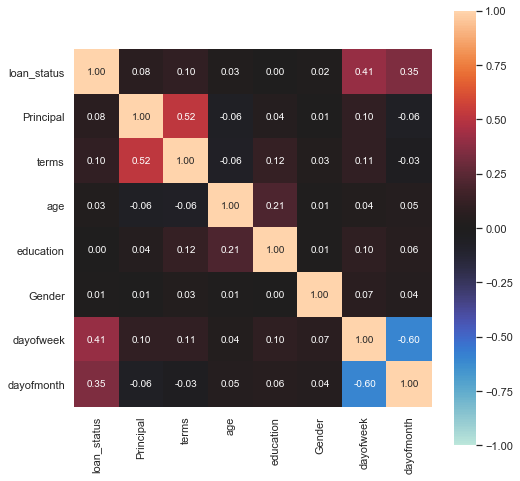

{'corr':              loan_status  Principal     terms       age  education    Gender  \
 loan_status     1.000000   0.076309  0.102102  0.027479   0.001151  0.016215   
 Principal       0.076309   1.000000  0.521876 -0.060893   0.041071  0.005134   
 terms           0.102102   0.521876  1.000000 -0.064762   0.124802  0.032399   
 age             0.027479  -0.060893 -0.064762  1.000000   0.210821  0.010519   
 education       0.002088   0.041071  0.124802  0.210821   1.000000  0.009775   
 Gender          0.012238   0.005134  0.032399  0.010519   0.004069  1.000000   
 dayofweek       0.408097   0.102318  0.107344  0.036584   0.097393  0.072690   
 dayofmonth      0.347277  -0.061072 -0.025531  0.046204   0.056224  0.044643   
 
              dayofweek  dayofmonth  
 loan_status   0.408097    0.347277  
 Principal     0.102318   -0.061072  
 terms         0.107344   -0.025531  
 age           0.036584    0.046204  
 education     0.097393    0.056224  
 Gender        0.072690    0.0446

In [108]:
associations(df[column_to_keep].iloc[:,:-2], theil_u=True, figsize=(8, 8))

**Correlations are indeed detected between loan_status and day-of-week (0.41) or day-of-month (0.35)**

## 2.6. Verifying the link between loan status and time variables using scatterplots and Pearson's correlation matrix.
For using the Pearson's correlation, the loan status and gender are converted into dummy variables.

### 2.6.1. Scatterplots 

In [109]:
# Creating a copy of the DataFrame and excluding the first and last 2 columns (which are irrelevant)
df_temp = df.iloc[:,2:-2].copy()
df_temp['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df_temp['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
#df_temp

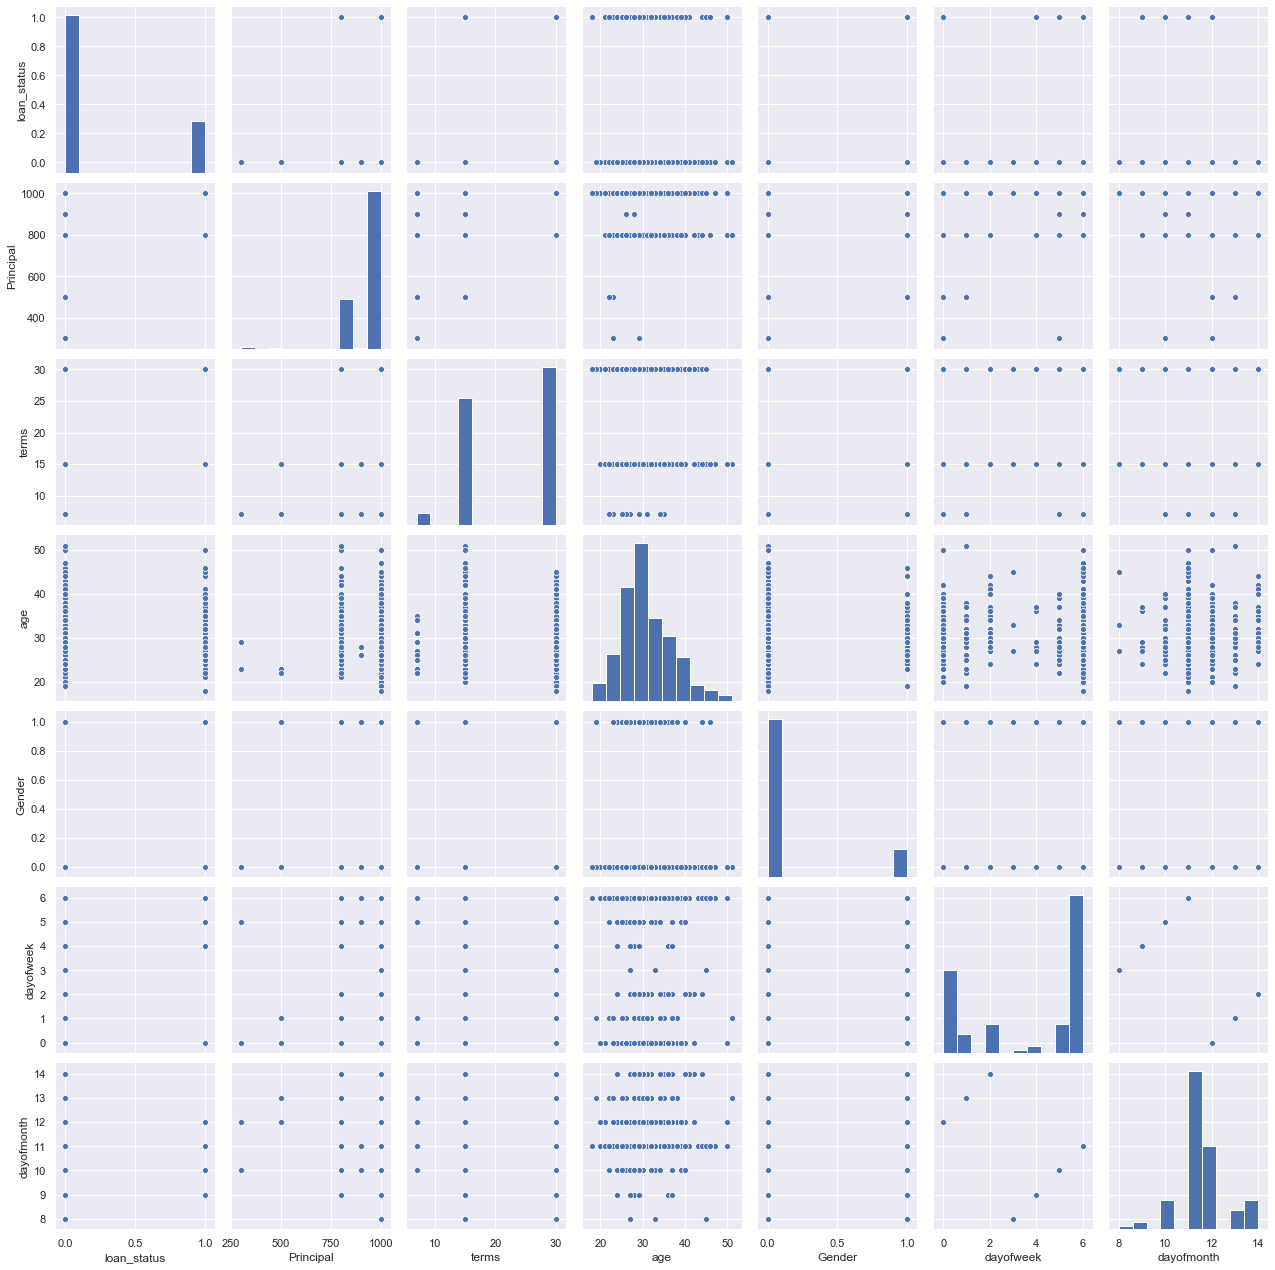

In [110]:
sns.pairplot(df_temp)

### 2.6.2. Correlation matrix 

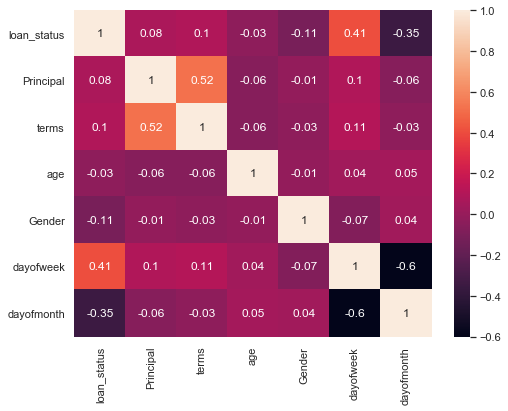

In [111]:
correlation_matrix = df_temp.corr().round(2)
#display(correlation_matrix)
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

#### Indeed, the link between loan status and time is also detected using the Pearson's correlation matrix (and  scatterplots)

# 3. Data visualization of specific variable combinations 

Plotting histograms of several columns to underestand data better


In [112]:
# excluding the two first a two last column (not relevant)
df = df.iloc[:,2:-2]

## 3.1. Checking the link between (i) gender; (ii) principal; and (iii) loan-status

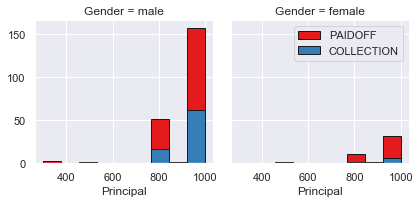

In [113]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

- No obvious link between these variables is detected 

## 3.2. Checking the link between (i) gender; (ii) age; and (iii) loan-status

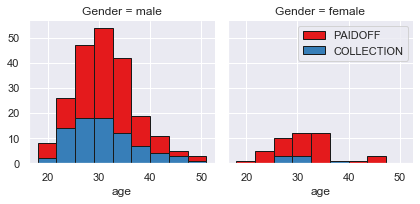

In [114]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

- It seems that people at the age of ~30 years tend to take more loans, but a weak link between age and loan status is observed 

## 3.3. Checking the link between (i) gender; (ii) day-of-week; and (iii) loan-status

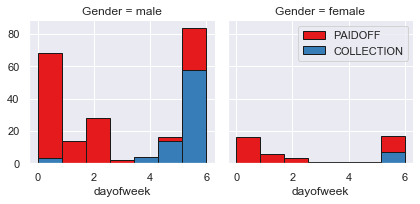

In [115]:
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 8)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


- As was also detected in the correlation analyses above, we see that people who get loans at the end of the week less pay it off. 
- In the next step feature binarization will be used to set a threshold values less than day 4.

## 3.4. Checking the link between (i) gender; (ii) day-of-month; and (iii) loan-status

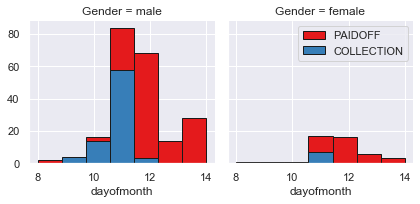

In [116]:
bins = np.linspace(df.dayofmonth.min(), df.dayofmonth.max(), 8)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofmonth', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


- Strong link between beween days of the month and loan status is seen; people who get the loan at days of 9-11 of that month less pay it off.   

- In the next step feature binarization will be used to set a threshold values more than day 12.

# 4. Pre-processing:  Feature selection / extraction

## 4.1. Converting  the day-of-week and day-of-month values to binary

In [117]:
# Using feature binarization to set a threshold values less than day 4
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

# feature binarization will be used to set a threshold values more than day 12
df['beginofmonth'] = df['dayofmonth'].apply(lambda x: 1 if (x<12)  else 0)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,dayofmonth,weekend,beginofmonth
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,8,0,1
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,8,0,1
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,8,0,1
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,9,1,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,9,1,1


## 4.2. Convert Categorical features to numerical values

#### Looking at gender:

In [118]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86% of females pay there loans while only 73% of males pay there loan


#### Converting male to 0 and female to 1:


In [119]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,dayofmonth,weekend,beginofmonth
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,8,0,1
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,8,0,1
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,8,0,1
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,9,1,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,9,1,1


## 4.3. One Hot Encoding 
#### Looking on education

In [120]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [122]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical variables to binary variables and append them to the feature Data Frame 

In [123]:
Feature = df[['Principal','terms','age','Gender','weekend', 'beginofmonth']]
Feature = pd.concat([Feature, pd.get_dummies(df['education'])], axis=1)
#Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,beginofmonth,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,1,0,1,0,0
1,1000,30,33,1,0,1,1,0,0,0
2,1000,15,27,0,0,1,0,0,0,1
3,1000,30,28,1,1,1,0,0,0,1
4,1000,30,29,0,1,1,0,0,0,1


## 4.4. Feature selection

### 4.4.1. Defind the feature sets, X:

In [124]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,beginofmonth,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,1,0,1,0,0
1,1000,30,33,1,0,1,1,0,0,0
2,1000,15,27,0,0,1,0,0,0,1
3,1000,30,28,1,1,1,0,0,0,1
4,1000,30,29,0,1,1,0,0,0,1


### 4.4.2. Define the lables (y):

In [125]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## 4.5. Normalize Data 

Data Standardization give data zero mean and unit variance

In [126]:
X= preprocessing.StandardScaler().fit(X).transform(X)
# looking on the standardized data by printing the first line 
X[0]

array([ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        0.81453148, -0.38170062,  1.13639374, -0.07624929, -0.86968108])

# 5. Classification 

Classification to predict loan-status will be performed using the following algorithms: 
- K Nearest Neighbor(KNN)
- Decision Tree 
- Support Vector Machine (SVM)
- Logistic Regression

First, a training set will be used to build the models, and then a test set will be used to examine the performance of the models 

## 5.1. Spliting the data to train and test set

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)

## 5.2. K Nearest Neighbor(KNN)

In [128]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

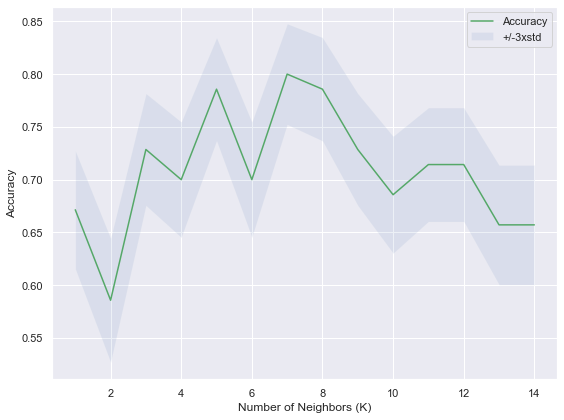

k = 7 give the best accuracy score with value of 0.8


In [129]:
#Finding the optimal K:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = []

for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

#Plotting model accuracy for Different number of Neighbors:
plt.plot(range(1,Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks), mean_acc-1*std_acc, mean_acc+1*std_acc, alpha=0.1)
plt.legend(('Accuracy', '+/-3xstd'))
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

print("k =", mean_acc.argmax()+1,"give the best accuracy score with value of", mean_acc.max())

In [130]:
#Training the KNN model with optimal K:
neigh = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1).fit(X_train, y_train)

#predicting using the model and test_set: 
yhat = neigh.predict(X_test)

#Evaluating model's accuracy with k=4: 
from sklearn import metrics
print('Train set Accuracy (for k={}):'.format(mean_acc.argmax()+1), metrics.accuracy_score(y_train, neigh.predict(X_train)))
print('Test set Accuracy(for k={}):'.format(mean_acc.argmax()+1), metrics.accuracy_score(y_test, yhat))
print()

Train set Accuracy (for k=7): 0.8043478260869565
Test set Accuracy(for k=7): 0.8



## 5.3. Decision Tree

In [131]:
from sklearn.tree import DecisionTreeClassifier

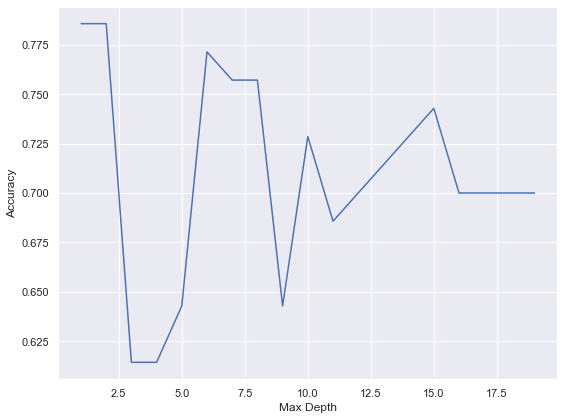

max_depth = 1 give the best accuracy score with value of 0.7857142857142857

Since depth of 1 is expected to result in underfitting, the second best max_depth = 6 will be used


In [132]:
#Modeling 
#finding the optimal max_depth:
Depth = 20
mean_acc = np.zeros(Depth-1)
for i in range(1,Depth):
    dec_tree = DecisionTreeClassifier(criterion="entropy", max_depth=i)
    dec_tree = dec_tree.fit(X_train,y_train)
    predTree = dec_tree.predict(X_test)
    mean_acc[i-1] = accuracy_score(y_test, predTree)
    
plt.plot(range(1,Depth),mean_acc)
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.tight_layout()
plt.show() 

print("max_depth =", mean_acc.argmax()+1,"give the best accuracy score with value of", mean_acc.max())
print("\nSince depth of 1 is expected to result in underfitting, the second best max_depth = 6 will be used")

In [133]:
#Evaluating the tree's accuracy with optimal max_depth (=6):
dec_tree = DecisionTreeClassifier(criterion="entropy", max_depth=6)
dec_tree = dec_tree.fit(X_train,y_train)
predTree = dec_tree.predict(X_test)
print("Accuaracy of Decision Tree (with max_depth = 6):", metrics.accuracy_score(y_test, predTree))

Accuaracy of Decision Tree (with max_depth = 6): 0.7714285714285715


# 5.4. Support Vector Machine

In [134]:
from sklearn import svm

In [135]:
#Modeling and predicting:
clf = svm.SVC(kernel='rbf', gamma='auto')
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)

# Evaluating model accuracy: 
print("Accuaracy of SVM :", metrics.accuracy_score(y_test, yhat))

Accuaracy of SVM : 0.7428571428571429


              precision    recall  f1-score   support

  COLLECTION       0.36      0.27      0.31        15
     PAIDOFF       0.81      0.87      0.84        55

    accuracy                           0.74        70
   macro avg       0.59      0.57      0.57        70
weighted avg       0.72      0.74      0.73        70

Confusion matrix, without normalization
[[ 4 11]
 [ 7 48]]


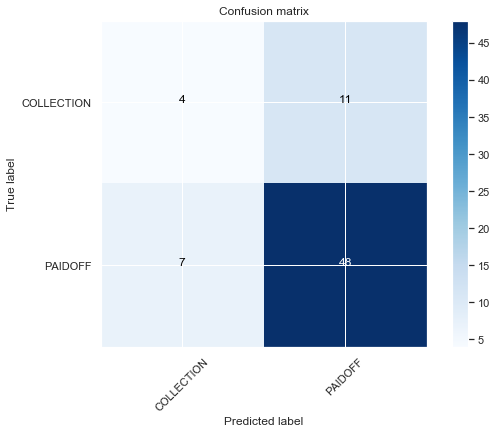

In [136]:
### Evaluating the model using Confusion matrix ###

from sklearn.metrics import classification_report, confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
cnf_matrix = confusion_matrix(y_test, yhat, labels=['COLLECTION','PAIDOFF'])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['COLLECTION','PAIDOFF'],normalize= False,  title='Confusion matrix')   



In [137]:
### Evaluating the model using f1 score ###

from sklearn.metrics import f1_score
f1_score = f1_score(y_test, yhat, average='weighted')
print('f1 score of the model:', f1_score)

### Evaluating the model using  jaccard index ###
from sklearn.metrics import jaccard_similarity_score
js = jaccard_similarity_score(y_test, yhat)
print('jaccard_similarity_score of the model:', js)

f1 score of the model: 0.7275882012724117
jaccard_similarity_score of the model: 0.7428571428571429


C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


## 5.5. Logistic Regression

In [138]:
from sklearn.linear_model import LogisticRegression

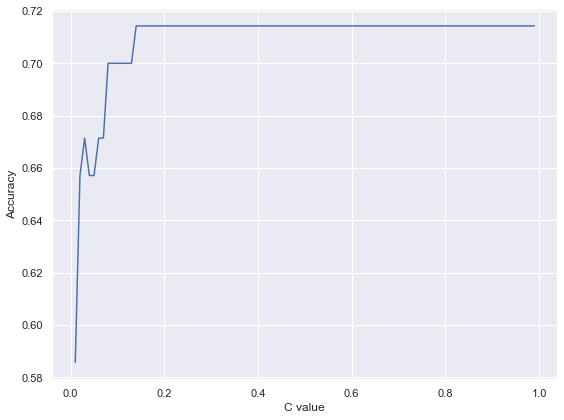

C = 0.13 give the best accuracy score with value of 0.7142857142857143


In [139]:
#finding the optimal C parameter: 
c = np.arange(0.01,1,0.01).tolist()
mean_acc = []
for i in c:
    LR = LogisticRegression(C=i, solver='liblinear').fit(X_train, y_train)
    yhat = LR.predict(X_test) 
    mean_acc.append(accuracy_score(y_test, yhat))
    
plt.plot(c,mean_acc)
plt.ylabel('Accuracy')
plt.xlabel('C value')
plt.tight_layout()
plt.show()
    
print("C =", np.array(mean_acc).argmax()*0.01,"give the best accuracy score with value of", np.array(mean_acc).max())


In [141]:
#Train the model with the optimal C parameter (=0.04):
LR = LogisticRegression(C=0.13, solver='liblinear').fit(X_train, y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

print("Logistic Regression Accuracy Score:", accuracy_score(y_test,yhat))


Logistic Regression Accuracy Score: 0.7


In [142]:
#Evaluating the model using jaccard index:
JS = jaccard_similarity_score(y_test, yhat)

print("jaccard_similarity_score:",JS)

#Evaluating the model using classification_report (precision, recall and F1):
CR = classification_report(y_test, yhat)
print('\n\nclassification_report:\n\n', CR)

#Evaluating the model using log loss:
from sklearn.metrics import log_loss
LL = log_loss(y_test, yhat_prob)
print("\n\nLog loss:", LL) 

jaccard_similarity_score: 0.7


classification_report:

               precision    recall  f1-score   support

  COLLECTION       0.20      0.13      0.16        15
     PAIDOFF       0.78      0.85      0.82        55

    accuracy                           0.70        70
   macro avg       0.49      0.49      0.49        70
weighted avg       0.66      0.70      0.68        70



Log loss: 0.5153704841435142


C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


# 6. Model Evaluation using Test set

In [143]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

## 6.1. Load Test Set for evaluation 

In [148]:
test_df = pd.read_csv('loan_test.csv')

## 6.2. Data preprocessing

In [149]:
# convert to data time object
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

In [150]:
#Data visualization and pre-processing:
#checking how many of each class is in our data set:
print(test_df['loan_status'].value_counts())

#use Feature binarization to set a threshold values less then day 4:
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

#use Feature binarization to set a threshold values more then day 11:
test_df['dayofmonth'] =  test_df['effective_date'].dt.day
test_df['beginofmonth'] = test_df['dayofmonth'].apply(lambda x: 1 if (x<12)  else 0)

#convert male to 0 and female to 1:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1], inplace=True)
display(test_df.head())

PAIDOFF       40
COLLECTION    14
Name: loan_status, dtype: int64


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,dayofmonth,beginofmonth
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0,8,1
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1,9,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1,10,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1,10,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1,11,1


In [151]:
#one hot encoding: 
#education:
Test_Feature = test_df[['Principal','terms','age','Gender','weekend', 'beginofmonth']]
Test_Feature = pd.concat([Test_Feature, pd.get_dummies(test_df['education'])], axis=1)
#Test_Feature.drop(['Master or Above'], axis=1, inplace=True)

#defining the feature set (X) and lables(y):
Test_X = Test_Feature
Test_y = test_df['loan_status'].values

#Normalize Data:
Test_X = preprocessing.StandardScaler().fit(Test_X).transform(Test_X)

## 6.3. KNN evaluation

In [152]:
####  KNN  ####

# KNN - predicting and evaluating model using Test_X and Test_y: 
Test_KKK_yhat = neigh.predict(Test_X)

#Evaluating the model using jaccard index:
KNN_JS = jaccard_similarity_score(Test_y, Test_KKK_yhat)
print("KNN jaccard_similarity_score:",KNN_JS)

#Evaluating the model using classification_report (precision, recall and F1):
KNN_CR = classification_report(Test_y, Test_KKK_yhat)
print('\n\nclassification_report:\n\n', KNN_CR)

#Calculating the weighted f1-score using the precision_recall_fscore_support function (this function is used so the f1-score could be pulled out easily):
from sklearn.metrics import precision_recall_fscore_support as score
precision,recall,KNN_fscore,support=score(Test_y, Test_KKK_yhat,average='weighted')
print('Precision : {}'.format(precision))
print('Recall    : {}'.format(recall))
print('F-score   : {}'.format(KNN_fscore))
print('Support   : {}'.format(support))

KNN jaccard_similarity_score: 0.7222222222222222


classification_report:

               precision    recall  f1-score   support

  COLLECTION       0.45      0.36      0.40        14
     PAIDOFF       0.79      0.85      0.82        40

    accuracy                           0.72        54
   macro avg       0.62      0.60      0.61        54
weighted avg       0.70      0.72      0.71        54

Precision : 0.703547098895936
Recall    : 0.7222222222222222
F-score   : 0.7105756358768406
Support   : None


C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


## 6.4. Decision Tree evaluation

In [153]:
####  Decision Tree  ####

# Decision Tree - predicting and evaluating model using Test_X and Test_y: 
Test_predTree_yhat = dec_tree.predict(Test_X)

#Evaluating the model using jaccard index:
DT_JS = jaccard_similarity_score(Test_y, Test_predTree_yhat)

print("jaccard_similarity_score:",DT_JS)


#Evaluating the model using classification_report (precision, recall and F1):
DT_CR = classification_report(Test_y, Test_predTree_yhat)
print('\n\nclassification_report:\n\n', DT_CR)

#Calculating the weighted f1-score using the precision_recall_fscore_support function (this function is used so the f1-score could be pulled out easily):
precision,recall,DT_fscore,support=score(Test_y, Test_predTree_yhat, average='weighted')
print('Precision : {}'.format(precision))
print('Recall    : {}'.format(recall))
print('F-score   : {}'.format(DT_fscore))
print('Support   : {}'.format(support))

jaccard_similarity_score: 0.7222222222222222


classification_report:

               precision    recall  f1-score   support

  COLLECTION       0.40      0.14      0.21        14
     PAIDOFF       0.76      0.93      0.83        40

    accuracy                           0.72        54
   macro avg       0.58      0.53      0.52        54
weighted avg       0.66      0.72      0.67        54

Precision : 0.6630385487528344
Recall    : 0.7222222222222222
F-score   : 0.6704776923582364
Support   : None


C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


## 6.5. SVM evaluation

In [154]:
####  SVM  ####

# SVM - predicting and evaluating model using Test_X and Test_y:

Test_SVM_yhat = clf.predict(Test_X)

#Evaluating the model using jaccard index:
SVM_JS = jaccard_similarity_score(Test_y, Test_SVM_yhat)

print("jaccard_similarity_score:",SVM_JS)


#Evaluating the model using classification_report (precision, recall and F1):
SVM_CR = classification_report(Test_y, Test_SVM_yhat)
print('\n\nclassification_report:\n\n', SVM_CR)

#Calculating the weighted f1-score using the precision_recall_fscore_support function (this function is used so the f1-score could be pulled out easily):
precision,recall,SVM_fscore,support=score(Test_y, Test_SVM_yhat, average='weighted')
print('Precision : {}'.format(precision))
print('Recall    : {}'.format(recall))
print('F-score   : {}'.format(SVM_fscore))
print('Support   : {}'.format(support))

jaccard_similarity_score: 0.8148148148148148


classification_report:

               precision    recall  f1-score   support

  COLLECTION       0.83      0.36      0.50        14
     PAIDOFF       0.81      0.97      0.89        40

    accuracy                           0.81        54
   macro avg       0.82      0.67      0.69        54
weighted avg       0.82      0.81      0.79        54

Precision : 0.8179012345679013
Recall    : 0.8148148148148148
F-score   : 0.7861952861952862
Support   : None


C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


## 6.6. Logistic Regression evaluation

In [155]:
####  LogisticRegression  ####

# LogisticRegression - predicting and evaluating model using Test_X and Test_y:

Test_LR_yhat = LR.predict(Test_X)
Test_LR_yhat_prob = LR.predict_proba(Test_X)

#Evaluating the model using jaccard index:
LR_JS = jaccard_similarity_score(Test_y, Test_LR_yhat)

print("jaccard_similarity_score:",LR_JS)


#Evaluating the model using classification_report (precision, recall and F1):
LR_CR = classification_report(Test_y, Test_LR_yhat)
print('\n\nclassification_report:\n\n', LR_CR)

#Calculating the weighted f1-score using the precision_recall_fscore_support function (this function is used so the f1-score could be pulled out):
precision,recall,LR_fscore,support=score(Test_y, Test_LR_yhat, average='weighted')
print('Precision : {}'.format(precision))
print('Recall    : {}'.format(recall))
print('F-score   : {}'.format(LR_fscore))
print('Support   : {}'.format(support))


#Evaluating the model using log loss
Test_LL = log_loss(Test_y, Test_LR_yhat_prob)
print("\n\nLog loss:", Test_LL) 

jaccard_similarity_score: 0.7407407407407407


classification_report:

               precision    recall  f1-score   support

  COLLECTION       0.50      0.14      0.22        14
     PAIDOFF       0.76      0.95      0.84        40

    accuracy                           0.74        54
   macro avg       0.63      0.55      0.53        54
weighted avg       0.69      0.74      0.68        54

Precision : 0.6925925925925925
Recall    : 0.7407407407407407
F-score   : 0.683127572016461
Support   : None


Log loss: 0.47122348468701963


C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


# 7. Models' Evaluation Report

In [156]:
# reporting scores of all algorithms:

report = [
            {'Algorithm':'KNN', 'Jaccard':KNN_JS, 'F1-score':KNN_fscore, 'LogLoss':np.nan},
            {'Algorithm':'Decision Tree', 'Jaccard':DT_JS, 'F1-score':DT_fscore, 'LogLoss':np.nan},
            {'Algorithm':'SVM', 'Jaccard':SVM_JS, 'F1-score':SVM_fscore, 'LogLoss':np.nan},
            {'Algorithm':'LogisticRegression', 'Jaccard':LR_JS, 'F1-score':LR_fscore, 'LogLoss':Test_LL}
         ] 
report_df = pd.DataFrame(report)
report_df

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.722222,0.710576,NaN
1,Decision Tree,0.722222,0.670478,NaN
2,SVM,0.814815,0.786195,NaN
3,LogisticRegression,0.740741,0.683128,0.471223


### The SVM model performed best in predicting loan status, relatively to the other models examined